In [1]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
from matplotlib.backends.backend_pdf import PdfPages
import topcoffea.modules.utils as utils
import mplhep as hep
import numpy as np

# import hist
# from hist import Hist

/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20}
plt.rcParams.update(params)

In [3]:
#Example usage with HistEFT: h.set_wilson_coefficients(**orig_pts)
orig_pts = {"ctGIm": 1.0, "ctGRe":0.7, "cQj38": 9.0, "cQj18": 7.0,
            "cQu8": 9.5, "cQd8": 12.0, "ctj8": 7.0, "ctu8": 9.0,
            "ctd8": 12.4, "cQj31": 3.0, "cQj11": 4.2, "cQu1": 5.5,
            "cQd1": 7.0, "ctj1": 4.4, "ctu1": 5.4, "ctd1": 7.0}

In [4]:
fin = "LHCEFT_ref_SM.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'tops_pt': <HistEFT (sample,tops_pt) instance at 0x7f3ac9715f40>, 'avg_top_pt': <HistEFT (sample,avg_top_pt) instance at 0x7f3ac78f7dc0>, 'l0pt': <HistEFT (sample,l0pt) instance at 0x7f3ac78f7340>, 'dr_leps': <HistEFT (sample,dr_leps) instance at 0x7f3af0fd9e80>}


In [8]:
def plot_hist_sm(hists, name, y_label):
    h = hists[name]
    h.set_sm()
    fig, ax = plt.subplots(1,1) #create an axis for plotting
    hist.plot1d(h, ax=ax, stack=False)
    # ax.set_ylabel(r"$d\sigma \: [pb] \; / \; d\Delta R \: [bin]$", fontsize='medium')
    ax.set_ylabel(y_label, fontsize='medium')
    ax.legend([r"$t\bar{t}$ (Ref_main)", r"$t\bar{t}$ (SM)", r"$t\bar{t}+$1 jet (Ref_main)", r"$t\bar{t}+$1 jet (SM)"], loc = 'upper right')
    # ax.text(0.1, 1.3, r"$pp \rightarrow t\bar{t} \rightarrow (l^+ \nu_l b)(l^- \bar{\nu_l}\bar{b})$", fontsize= 20)
    # fig.suptitle("Reweighted to SM")
    # figname = label + '_SM_' + name + '.png'
    fig.show()
    # fig.savefig(figname)
    # print("Histogram saved to:", figname)
    # plt.close(fig)

/tmp/ipykernel_2390055/238738793.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


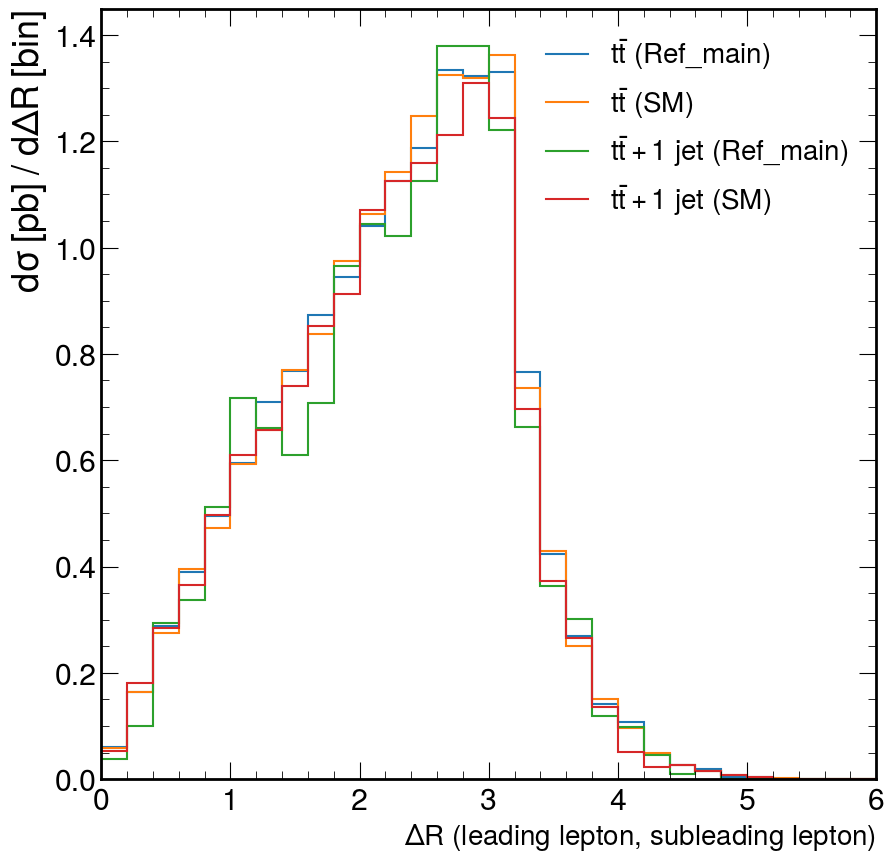

In [9]:
plot_hist_sm(hists, 'dr_leps', r"$d\sigma \: [pb] \; / \; d\Delta R \: [bin]$")

In [ ]:
h = hists['dr_leps']
h.set_sm()
#h.set_wilson_coefficients(**orig_pts)
# print(h._wcs)
# print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

### Get Value of sow to get normalization for each sample

In [12]:
#fin = "njets_nocuts_norm.pkl.gz"
# fin = "dim6top_njets.pkl.gz"
# fin = "LHCEFT_all_sow.pkl.gz"
# fin = "TT01j2l_S4_njets_sow.pkl.gz"
fin = "central_TTJets_sow.pkl.gz"
# fin = "noEFT_sow.pkl.gz"

In [13]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'sow': <HistEFT (sample,sow) instance at 0x7f17751731c0>, 'sow_norm': <HistEFT (sample,sow_norm) instance at 0x7f1774ee5820>, 'nevents': <HistEFT (sample,nevents) instance at 0x7f1774ee5ca0>, 'njets': <HistEFT (sample,njets) instance at 0x7f1774ee5f70>}


[]
{('TTJets_centralUL17',): array([3.31459032e+10])}


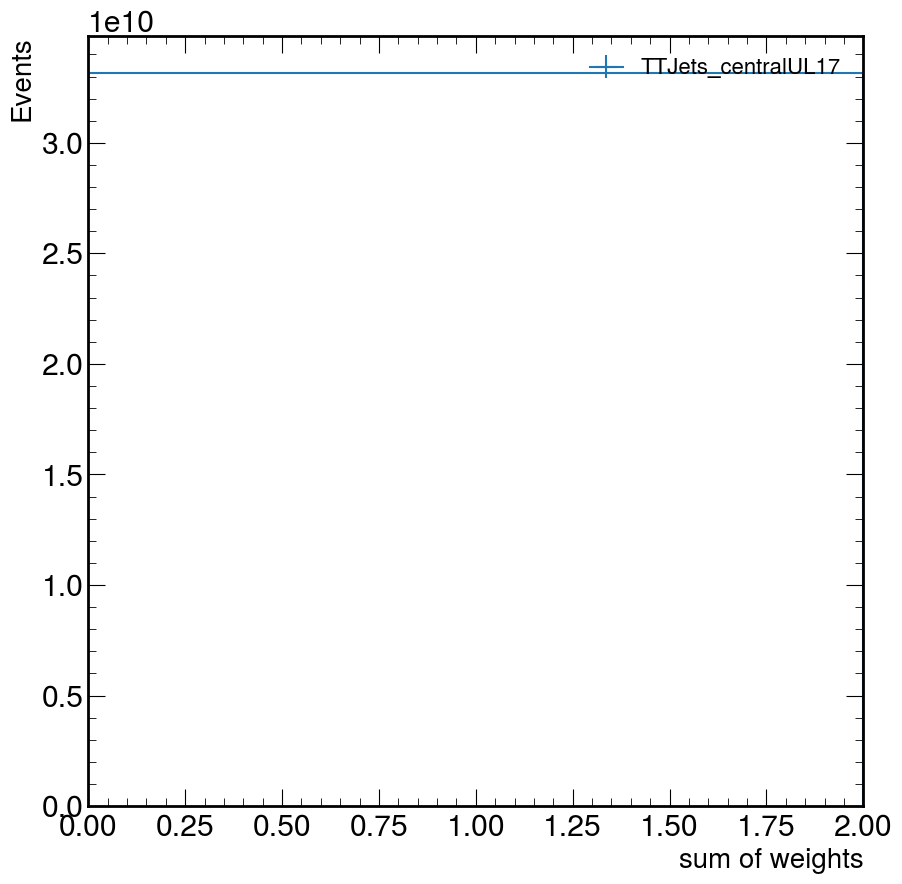

In [14]:
# Getting values for sow for normalization of samples
# ax.set_prop_cycle(color = ['blue', 'orange', 'green', 'red', 'purple', 'black'])

h = hists['sow']
h.set_sm()
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)
ax.legend(loc='upper right', fontsize=16)

# h = hists['nevents']
# h.set_sm()
# print(h._wcs)
# print(h.values())

### Plots of HT to check for a cut in my gridpack

In [ ]:
fin = "HTcut.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

In [ ]:
h = hists['LHE_HT']
# h.set_sm()
h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

In [ ]:
h = hists['LHE_HTIncoming']
# h.set_sm()
h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

### Make plots of all TT01j2l samples compared to central, correct normalization

In [ ]:
fin = 'all_signal.pkl.gz'

In [ ]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

In [ ]:
def plot_hist_sm(hists, name):
    h = hists[name]
    h.set_sm()
    # print(name, h.values())
    fig, ax = plt.subplots(1,1) #create an axis for plotting
    hist.plot1d(h, ax=ax, stack=False)
    ax.legend()
    fig.suptitle("Reweighted to SM")
    plt.show()

In [ ]:
for name in hists:
    plot_hist_sm(hists, name)

### Check DRJ plots from nanoGen

In [48]:
fin = "djr_test.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'djr_10_all': <HistEFT (sample,djr_10_all) instance at 0x7fad7f21f430>, 'djr_10_0p': <HistEFT (sample,djr_10_0p) instance at 0x7fad80911550>, 'djr_10_1p': <HistEFT (sample,djr_10_1p) instance at 0x7fad7a75e5e0>}


/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/hist/plot.py:333: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, None)
/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/hist/plot.py:333: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, None)
/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/hist/plot.py:333: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, None)


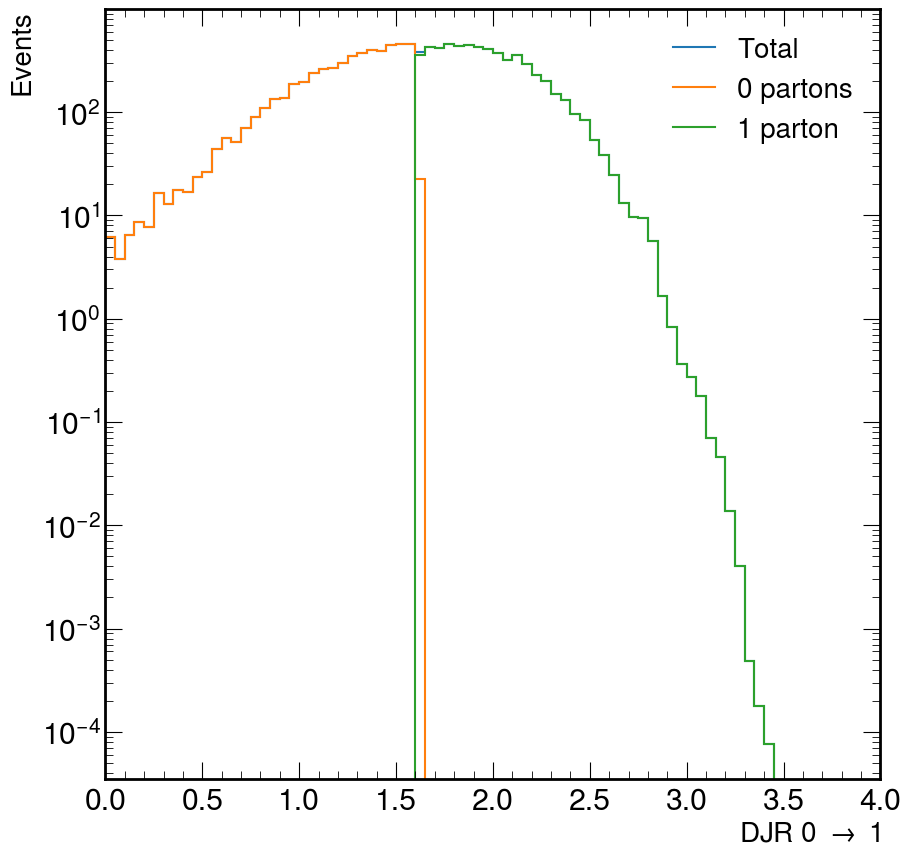

In [55]:
h = hists['djr_10_all']
h0 = hists['djr_10_0p']
h1 = hists['djr_10_1p']
fig, ax = plt.subplots(1,1)
ax.set_yscale('log')
# h.set_sm()
# h0.set_sm()
# h1.set_sm()
hist.plot1d(h, stack=False)
hist.plot1d(h0, stack=False)
hist.plot1d(h1, stack=False)
ax.set_xlabel(r"DJR 0 $\rightarrow$ 1")
# ax.set_yscale('log')
ax.legend(["Total", "0 partons", "1 parton"])

In [34]:
fin = "new_processor_test.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'top_eta': <HistEFT (sample,top_eta) instance at 0x7fad7e2b7220>, 'top_phi': <HistEFT (sample,top_phi) instance at 0x7fad7e2b7340>}


{('tt+1 jet (Ref_main)',): array([ 91.11367889,  88.46393464, 114.73327148,  93.30780111,
        90.65366801, 108.59295399,  99.77895382, 108.24608106,
        95.25665316, 103.03408599,  99.2727461 , 109.76380294,
       116.89984974,  96.02575592, 108.89667665,  91.0202003 ,
        96.27510669,  97.51978268,  95.84585417,  83.61143419,
       122.45183476, 111.105708  ,  98.81170726,  97.99367144,
        98.81961009,  97.21721029, 105.89625475,  95.97564006,
        85.7021512 ,  96.90672737])}


/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/hist/plot.py:333: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, None)


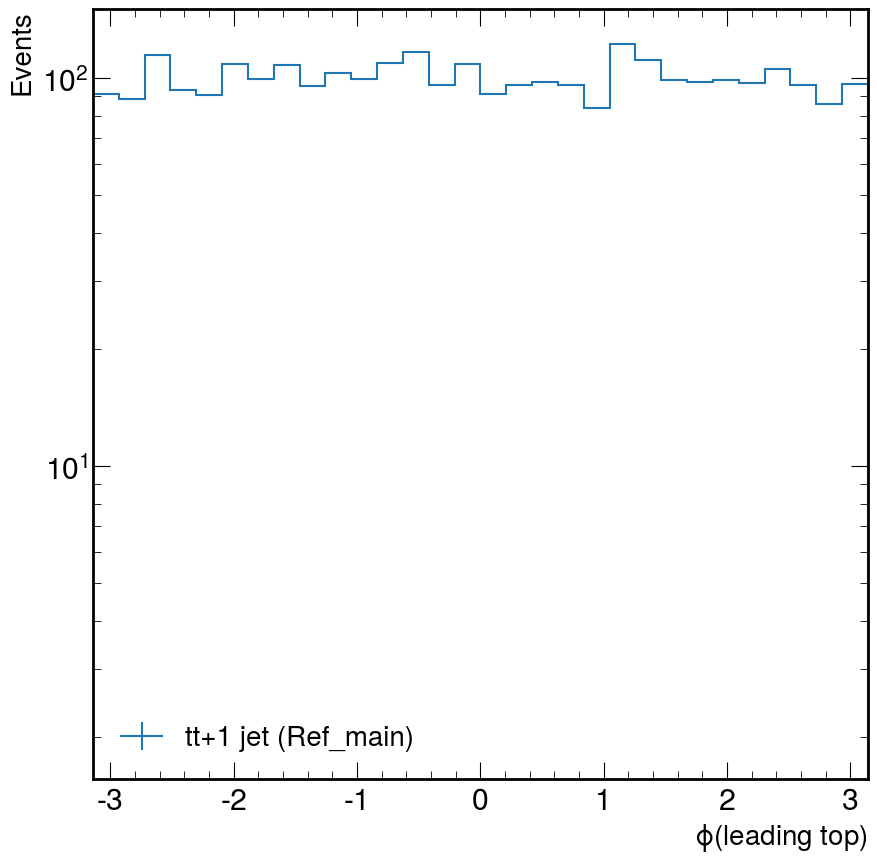

In [41]:
h = hists['top_phi']
h.set_sm()
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, stack=False)
# ax.set_yscale('log')
ax.legend()

In [4]:
# fin = "nanoGen_v5_cfg_test.pkl.gz"
# fin = "v6_cfg_test.pkl.gz"
fin = "v7_robert_cfg.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'njets': <HistEFT (sample,njets) instance at 0x7fd2c01792b0>}


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


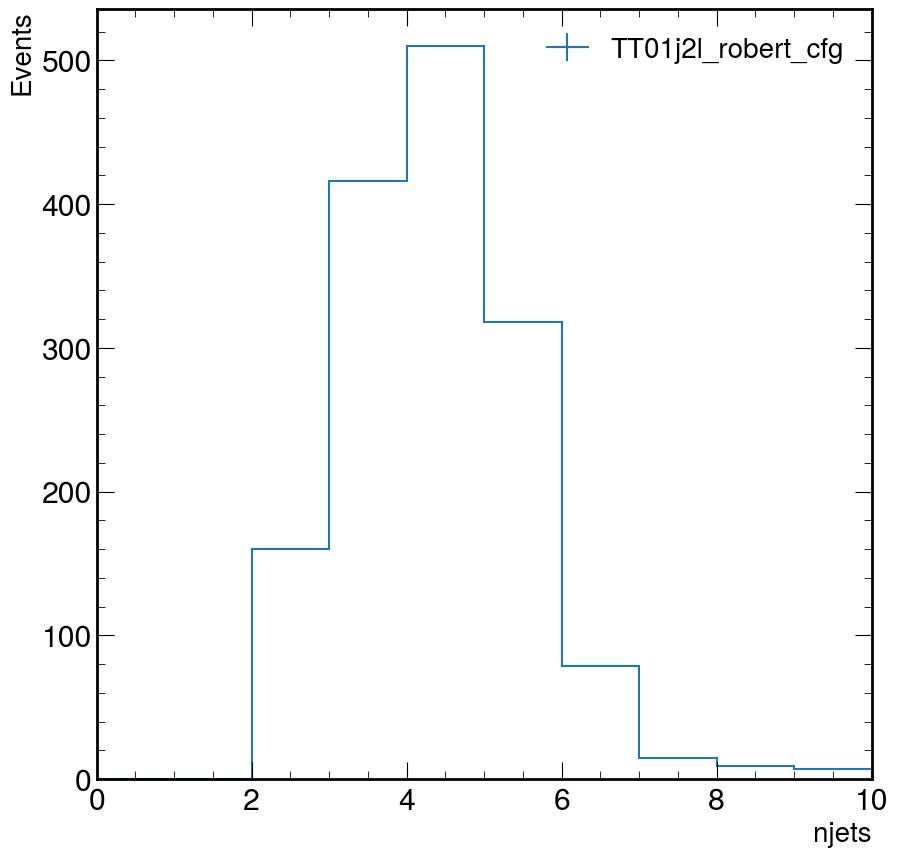

In [5]:
h = hists['njets']
h.set_sm()
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)
ax.legend()

In [4]:
# fin = "jet_flav_noEFT_TT01j2l_ref.pkl.gz"
# fin = "jet_flav_TT01j2l_ref.pkl.gz"
fin = "TT01j2l_ref_djr_jet_flav_njets.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'jet_flav': <HistEFT (sample,jet_flav) instance at 0x7ff104140580>, 'njets_0p': <HistEFT (sample,njets_0p) instance at 0x7ff10227caf0>, 'njets_1p': <HistEFT (sample,njets_1p) instance at 0x7ff10227cb50>, 'njets': <HistEFT (sample,njets) instance at 0x7ff10227ceb0>}


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


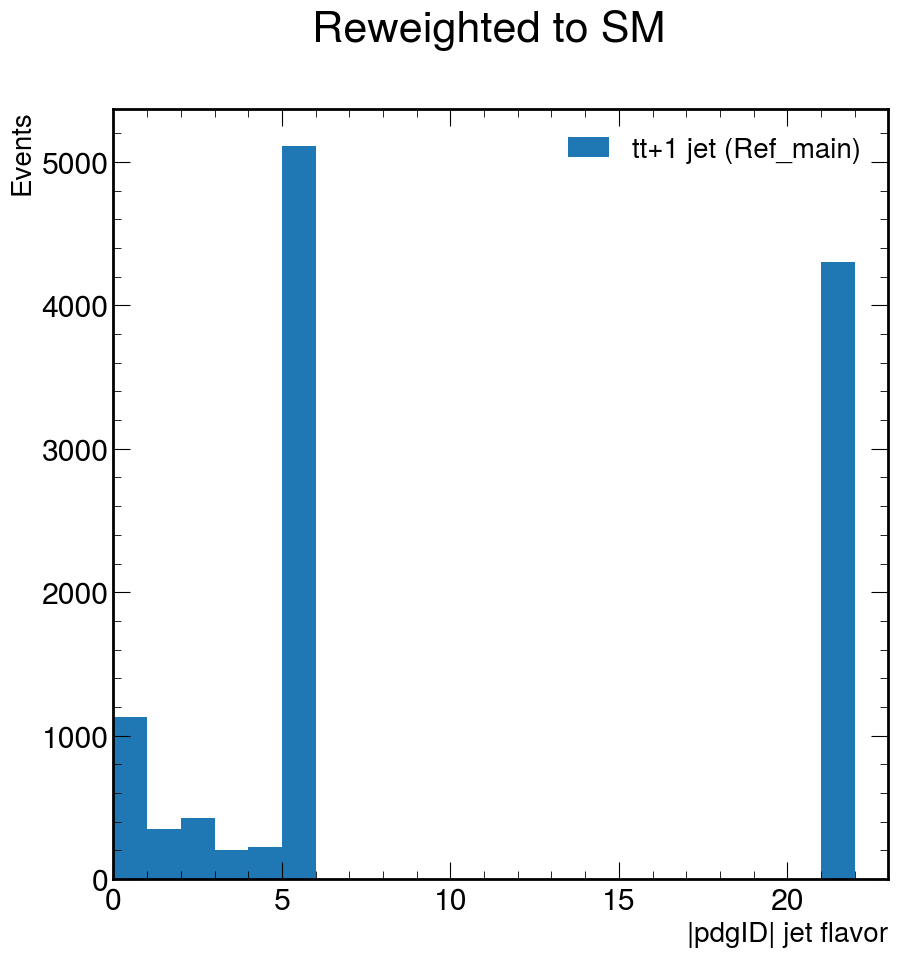

In [13]:
h = hists['jet_flav']
h.set_sm()
# print(h._wcs)
# h.set_wilson_coefficients(**couplings)
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)
fig.suptitle("Reweighted to SM")
ax.set_xlabel("|pdgID| jet flavor") 
ax.legend()

[ 7.   4.4  3.   7.   7.  12.4  0.7  1.   4.2  7.   9.  12.   5.4  5.5
  9.   9.5]


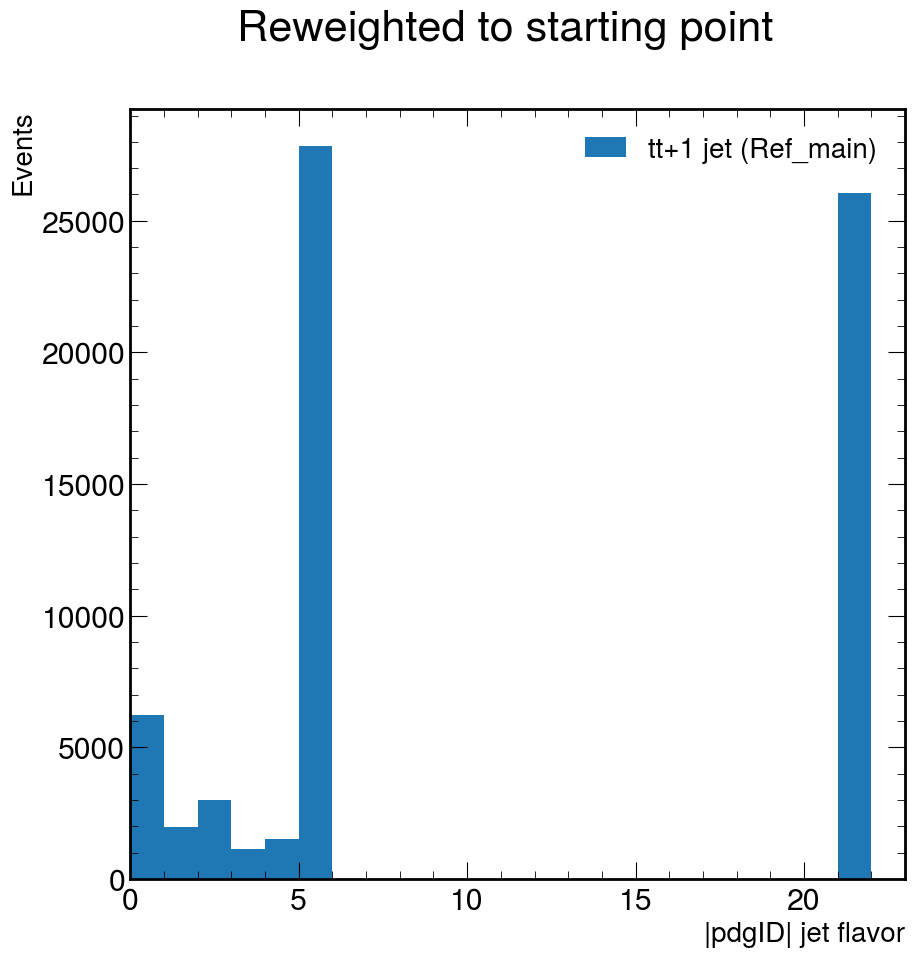

In [15]:
h = hists['jet_flav']
# h.set_sm()
# print(h._wcs)
h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)
fig.suptitle("Reweighted to starting point")
ax.set_xlabel("|pdgID| jet flavor") 
ax.legend()

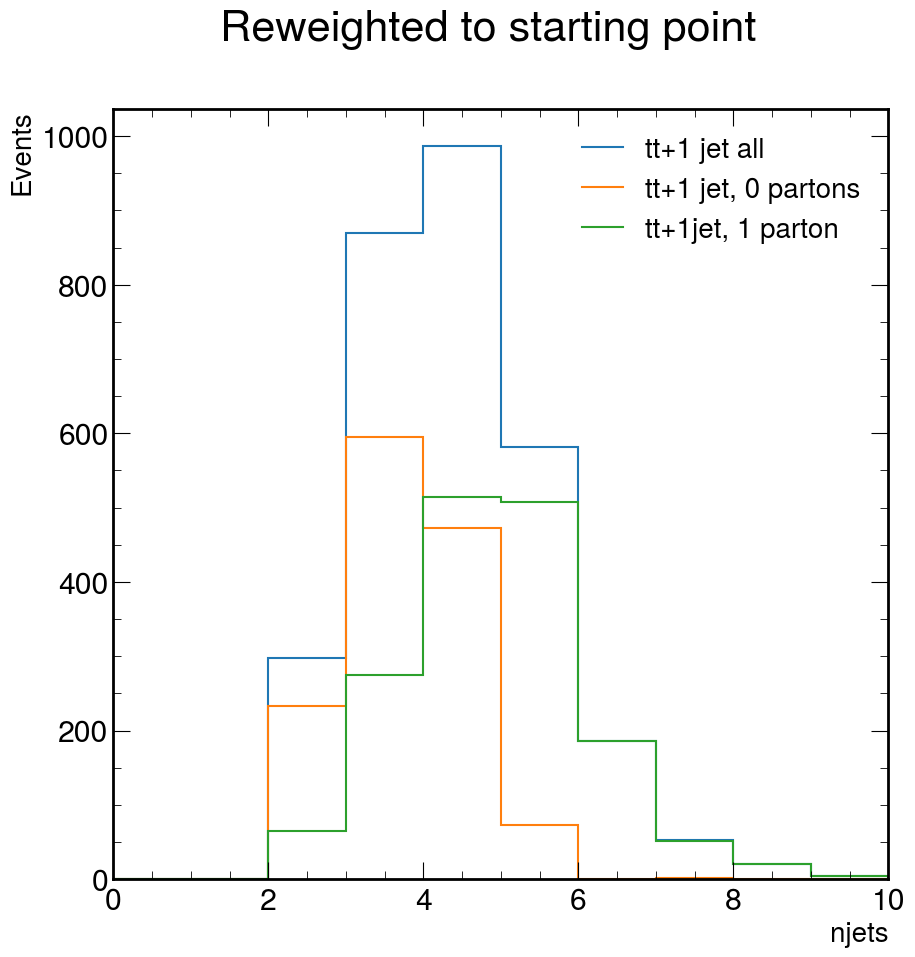

In [29]:
h = hists['njets']
h0 = hists['njets_0p']
h1 = hists['njets_1p']
h.set_sm()
h0.set_sm()
h1.set_sm()
# print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, stack=False)
hist.plot1d(h0, stack=False)
hist.plot1d(h1, stack=False)
fig.suptitle("Reweighted to SM")
ax.legend(["tt+1 jet all", "tt+1 jet, 0 partons", "tt+1jet, 1 parton"])

In [16]:
# h = hists['jet_flav']
# fig, ax = plt.subplots(1,1)
# hep.histplot(h, ax=ax, stack=False, label="noEFT weighting")
# ax.legend()

In [30]:
fin = "central_TT01j2lref_xsec.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('tt+1 jet (Ref_main)',): array([0.        , 0.        , 1.26960529, 3.91439742, 4.63835838,
       2.51374352, 0.96086264, 0.27246731, 0.14746462, 0.0090546 ]), ('TTJets_centralUL17',): array([0.00000000e+00, 0.00000000e+00, 9.39205398e+00, 5.11337739e+00,
       1.74594365e+00, 4.78209867e-01, 1.16970270e-01, 2.77990319e-02,
       5.66327901e-03, 1.58904403e-03])}


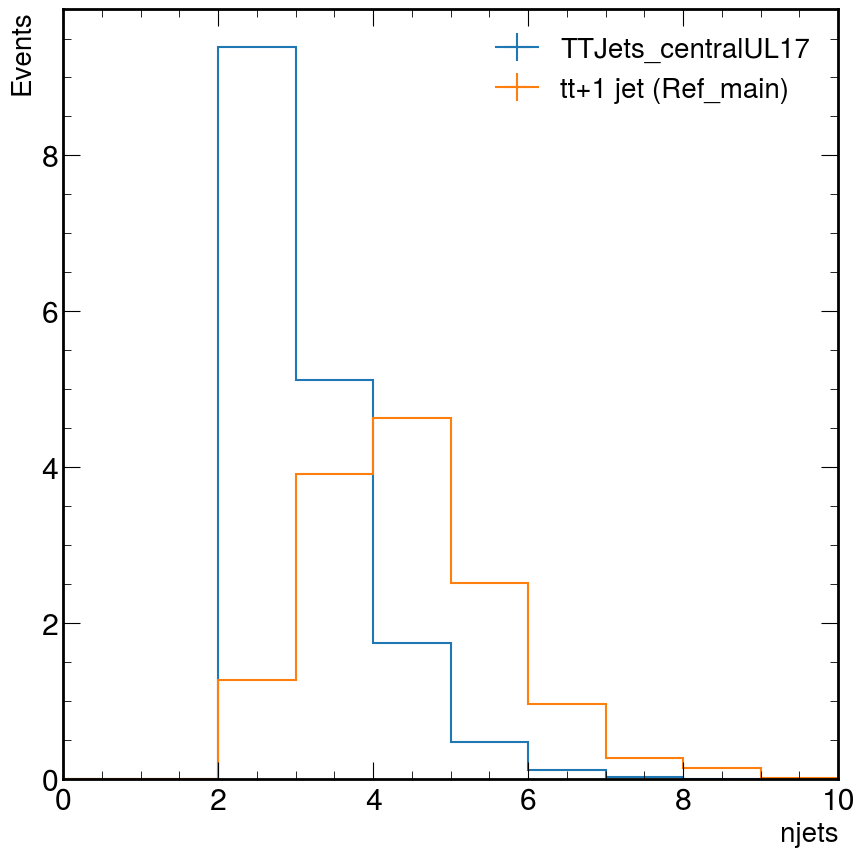

In [49]:
h = hists['njets']
h.set_sm()
# h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)
print(h.values())
ax.legend()

In [8]:
fin = "v7_robert_cfg.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('TT01j2l_robert_cfg',): array([  0.        ,   0.        , 159.74453808, 416.2399908 ,
       510.11844621, 318.08564565,  78.74040974,  14.8851738 ,
         8.85631642,   6.75054216])}


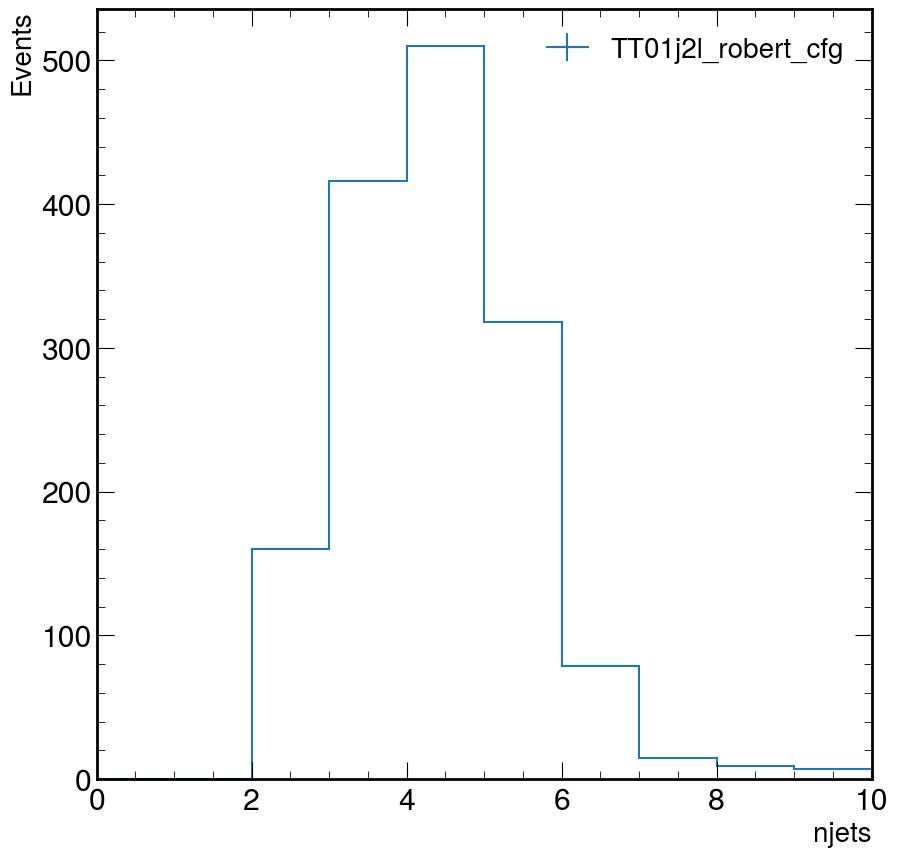

In [9]:
h = hists['njets']
h.set_sm()
# h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)
print(h.values())
ax.legend()

[]
{('Robert_GEN_toNanoGen',): array([    0.,     0.,  5614., 14556., 16727.,  8943.,  3425.,  1051.,
         268.,    60.])}


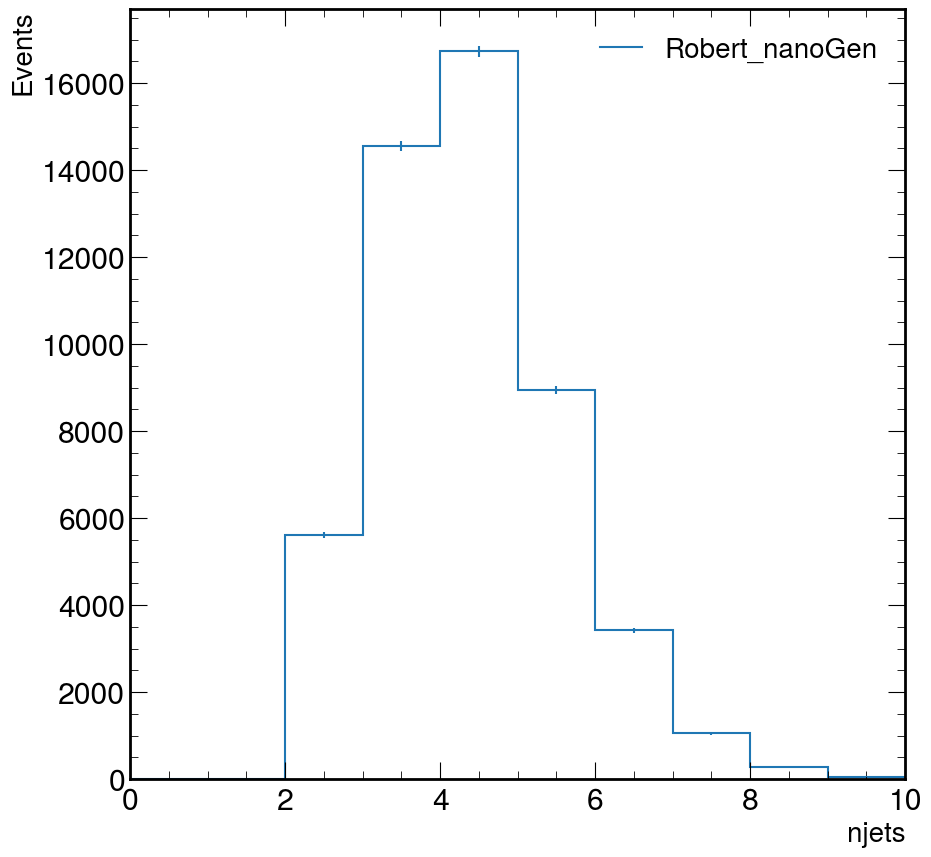

In [7]:
fin = "Robert_GEN.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
h = hists['njets']
h.set_sm()
# h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=False)
print(h.values())
ax.legend(["Robert_nanoGen"],loc = "upper right")

In [33]:
# fin = "NJETS.pkl.gz"
# fin = "TT01j2l_S4v8.pkl.gz"
fin = "central_TT01j2l_S4v8.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
hists

{'tops_pt': <HistEFT (sample,tops_pt) instance at 0x7f17744efe50>,
 'avg_top_pt': <HistEFT (sample,avg_top_pt) instance at 0x7f177436bb80>,
 'l0pt': <HistEFT (sample,l0pt) instance at 0x7f17741b8310>,
 'dr_leps': <HistEFT (sample,dr_leps) instance at 0x7f17741b83a0>,
 'ht': <HistEFT (sample,ht) instance at 0x7f17744d5d00>,
 'jets_pt': <HistEFT (sample,jets_pt) instance at 0x7f17741b8bb0>,
 'j0pt': <HistEFT (sample,j0pt) instance at 0x7f17741b8f70>,
 'ntops': <HistEFT (sample,ntops) instance at 0x7f177422ffa0>,
 'njets': <HistEFT (sample,njets) instance at 0x7f177422fee0>,
 'mtt': <HistEFT (sample,mtt) instance at 0x7f177422f3d0>,
 'nleps': <HistEFT (sample,nleps) instance at 0x7f17741c2130>,
 'mll': <HistEFT (sample,mll) instance at 0x7f17741c2340>}

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('TT01j2l_S4',): array([5.28378679e-03, 1.61283876e-02, 2.44490199e-02, 3.36949542e-02,
       3.09366820e-02, 2.51430104e-02, 1.96837721e-02, 1.66256404e-02,
       1.13533314e-02, 7.00809402e-03, 5.89441303e-03, 4.41881270e-03,
       3.67425896e-03, 2.14907792e-03, 2.38869018e-03, 1.35522014e-03,
       1.09681364e-03, 6.10957696e-04, 9.74071510e-04, 5.11212162e-04,
       5.82431938e-04, 2.43902329e-04, 5.38626765e-04, 2.46033254e-04,
       1.92199447e-04, 2.58359674e-05, 8.84125675e-06, 5.22500712e-05,
       2.55835839e-05, 7.71931287e-05, 1.10340951e-06, 8.66759489e-06,
       2.00199481e-06, 4.63782502e-06, 1.63951052e-06, 6.06254438e-05,
       5.55318977e-05, 6.59965391e-07, 2.46044046e-06, 5.52869853e-07,
       5.94687967e-06, 0.00000000e+00, 1.09050795e-06, 7.43145036e-08,
       1.20841295e-06, 8.65573390e-07, 0.00000000e+00, 3.44049315e-07,
       4.77386814e-09, 6.60621508e-09]), ('TTJets_centralUL17',): array([7.52582

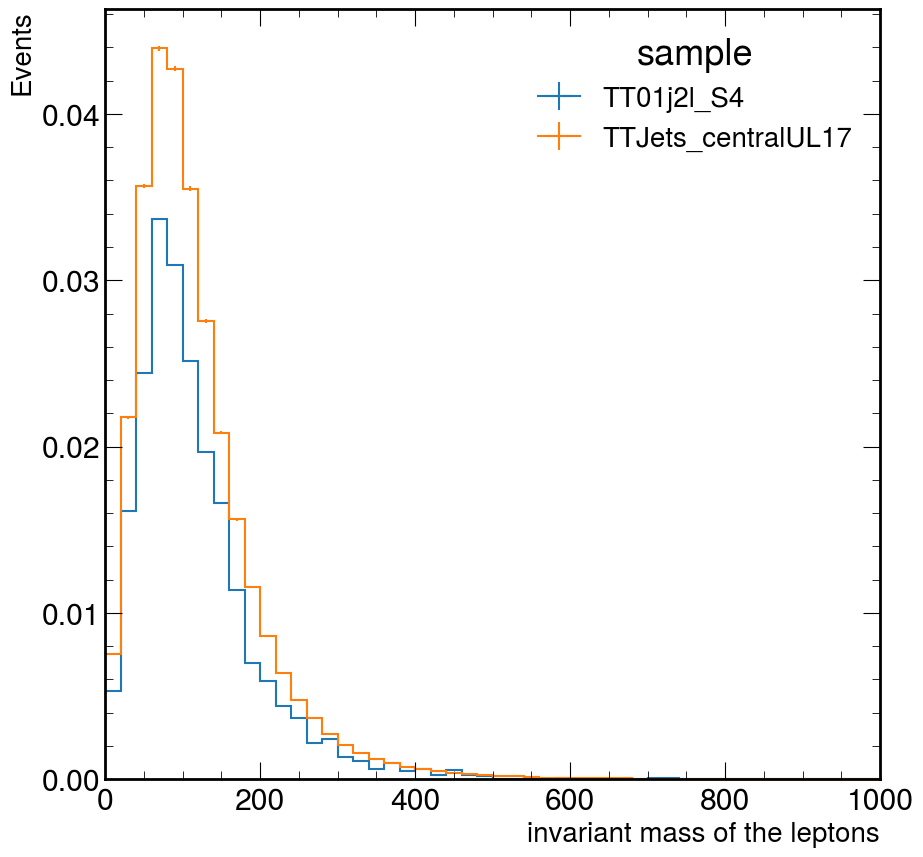

In [34]:
h = hists['mll']
h.set_sm()
# h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
fig, ax = plt.subplots(1,1)
# ax.set_yscale('log')
hist.plot1d(h, ax=ax, stack=False)
print(h.values())